In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
import cmocean as cmo
import xarray as xr 
import cartopy
import cartopy.crs as ccrs
from scipy.io import loadmat
from scipy.interpolate import interp1d
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# LOAD EOFS
cm26_eof_path = '/Users/jakesteinberg/Documents/CPT/models/CM2.6_EOF_analysis_w_amplitudes.nc'
cmEOF = xr.open_dataset(cm26_eof_path)
# shift EOF longitudes to match with modes 
lon01 = cmEOF.lon.data
eofu1_a = np.concatenate((cmEOF.eof1u_mag[:,:,lon01 >= 0].data, cmEOF.eof1u_mag[:,:,lon01 < 0].data),axis=2)
lon1 = np.concatenate((lon01[lon01 >= 0], lon01[lon01 < 0]+360))
lat1 = cmEOF.lat.data

In [3]:
cmEOF

<xarray.Dataset>
Dimensions:    (lat: 270, lon: 360, time: 73, zl: 50)
Coordinates:
  * zl         (zl) float64 5.034 15.1 25.22 ... 4.975e+03 5.185e+03 5.395e+03
  * lat        (lat) float64 -81.11 -80.69 -80.26 -79.84 ... 88.75 89.18 89.6
  * lon        (lon) float64 -279.9 -278.9 -277.9 -276.9 ... 77.05 78.05 79.05
  * time       (time) object 0201-01-03 12:00:00 ... 0201-12-29 12:00:00
Data variables:
    EOF1u      (zl, lat, lon) float32 ...
    EOF1v      (zl, lat, lon) float32 ...
    pvaru      (lat, lon) float32 ...
    pvarv      (lat, lon) float32 ...
    eof1u_mag  (time, lat, lon) float32 ...
    eof1v_mag  (time, lat, lon) float32 ...

In [15]:
lon_check = 310
lat_check = -40
i1 = np.where((lon1 > lon_check) & (lon1 < lon_check+1))[0][0]
j1 = np.where((lat1 >= lat_check) & (lat1 < lat_check+0.5))[0][0]

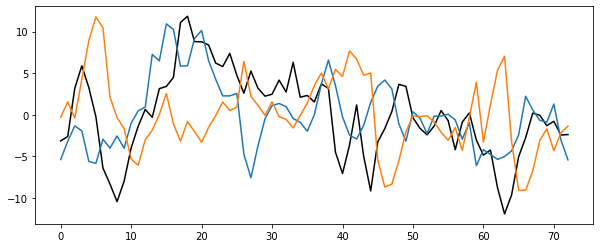

In [18]:
f, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(np.arange(len(cmEOF.time)),eofu1_a[:,j1,i1],linestyle='-',color='k')
ax.plot(np.arange(len(cmEOF.time)),eofu1_a[:,j1-1,i1],linestyle='-')
ax.plot(np.arange(len(cmEOF.time)),eofu1_a[:,j1+1,i1],linestyle='-')